In [82]:
import sys
from typing import Callable

sys.path.append('../')

import random
from helper import *

$$ MSE = \frac{1}{\textit{bath\_size}}\ \sum_{i = 0}^{\textit{bath\_size}} (y_i - \overline{y_i})^2, $$
$$ \text{где } \overline{y_i} = w_0 + w_1 \cdot x + w_2 \cdot x^2 + \dots + w_n \cdot x^n $$
$$ \frac{d MSE}{d w_0} = \frac{-2}{\textit{bath\_size}} \sum_{i = 0}^{\textit{bath\_size}} (y_i - \overline{y_i}) = \sum_{i = 0}^{\textit{bath\_size}} (y_i - (w_0 + w_1 \cdot x + \dots + w_n \cdot x^n)) $$
$$ \frac{d MSE}{d w_1} = \frac{-2}{\textit{bath\_size}} \sum_{i = 0}^{\textit{bath\_size}} x_i \  (y_i - \overline{y_i}) = \sum_{i = 0}^{\textit{bath\_size}} x_i \  (y_i - (w_0 + w_1 \cdot x + \dots + w_n \cdot x^n)) $$
$$ \cdots $$
$$ \frac{d MSE}{d w_n} = \frac{-2}{\textit{bath\_size}} \sum_{i = 0}^{\textit{bath\_size}} x_i^n \  (y_i - \overline{y_i}) = \sum_{i = 0}^{\textit{bath\_size}} x_i^n \  (y_i - (w_0 + w_1 \cdot x + \dots + w_n \cdot x^n)) $$

In [83]:
class stochastic:
    def func(self, x, w):
        pows = [x ** i for i in range(len(w))]
        return w.dot(pows)

    def mse_loss(self, w):
        # y_pred = self.func(self.X, w)
        # mse = np.mean((self.y - y_pred) ** 2)
        # return mse
        
        y_pred = np.array([self.func(x, w) for x in self.X])
        return sum((self.y - y_pred) * (self.y - y_pred)) / len(self.y) + np.sum((w ** 2) * self.constant_lambda)

    def mse_loss_grad(self, w):
        # print(self.X.shape, self.y.shape)

        # Choose n random data points from the training set without replacement
        indices = np.random.choice(self.X.shape[0], self.batch_size, replace=False)
        # Getting data from dataset according indices
        X_batch = self.X[indices]
        y_batch = self.y[indices]

        # print(X_batch.shape, y_batch.shape)

        # Compute the gradient of the MSE loss with respect to x for the chosen data points
        y_pred = np.array([self.func(x, w) for x in X_batch])
        X_batch_pow = [X_batch ** i for i in range(len(w))]
        
        # grad = (-2 / self.batch_size) * np.array([sum([X_batch_pow[i][j] * (y_batch[j] - y_pred[j]) for j in range(self.batch_size)]) for i in range(len(w))])
        grad = (-2 / self.batch_size) * np.array([X_batch_pow[i].dot(y_batch - y_pred) for i in range(len(w))])
        # print(f'grad: {grad}')

        # Sum values in rows of grad and divide by n
        # grad_mean = np.mean(grad)
        # print(grad_mean)
        
        grad += 2 * self.constant_lambda * w

        return grad
    
    def __init__(self, X, y, batch_size=2, method='mse'):
        self.X = X
        self.y = y
        self.batch_size = batch_size
        self.constant_lambda = 0.09

        if self.batch_size > X.shape[0]:
            self.batch_size = X.shape[0]

        if method == 'mse':
            self.f = self.mse_loss 
            self.grad = self.mse_loss_grad
        else:
            print('method not found')
        

    def constant_lr_scheduling(epoch, initial_lr):
        return initial_lr

    def gradient_descent(self, x0, lr_scheduling_func=constant_lr_scheduling, initial_lr=0.1, max_epochs=100, eps=1e-5, minimum = 0.0, apply_min=False, apply_value=True):
        """
        Cтохастический градиентный спуск для поиска минимума функции.

        Аргументы:
            x0 (list): Начальную точка, с которой начинается поиск.
            initial_lr (float): learning_rate - Начальная скорость обучения или шаг градиентного спуска.
            max_epochs (int): Максимальное количество эпох или итераций для выполнения алгоритма.
            minimum (float): Минимум функции.
            epsilon (float): Малое число, используемое как критерий останова для алгоритма.
        Возвращает:
            Список всех точек, посещенных во время алгоритма.
        """
        return custom_gradient_descent_with_lr_scheduling(self.f, self.grad, x0, lr_scheduling_func, initial_lr, max_epochs, eps, minimum, apply_min, apply_value)
    
    def get_loss_history(self, results):
        loss_history = []

        for i in range(len(results)):
            loss_history.append(self.f(results[i]))

        return loss_history

In [84]:
def f(x, w):
    pows = [x ** i for i in range(len(w))]
    return w.dot(pows)

# Генерируем случайные точки
weights = np.array([15, 3, 4, -2])

density = 8000
dots_count = 300
variance = 1
dist = 1.6
X = np.linspace(-dist, dist, density)
Y = np.array([np.sin(3 * x) for x in X])
Dataset_X = np.random.rand(dots_count, 1) * 2 * dist - dist
Dataset_Y = np.array([(np.sin(3 * x) + random.uniform(-1, 1) * variance) for x in Dataset_X])

# sgd = stochastic(X, Dataset)

# results = sgd.gradient_descent(np.array([0], float), max_epochs=1000)

Коэффициенты уравнения прямой:
y = 15x^0 + 3x^1 + 4x^2 + -2x^3


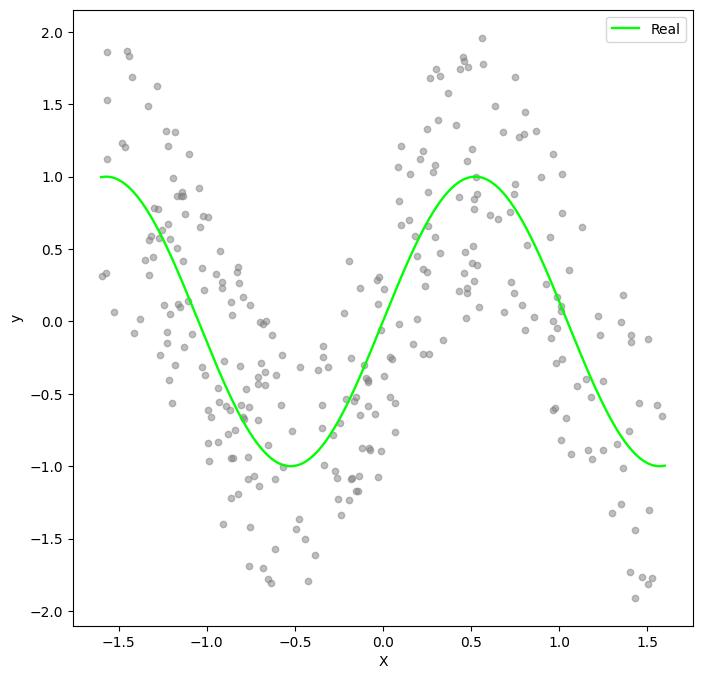

In [85]:
print("Коэффициенты уравнения прямой:")
print(f"y = {' + '.join([f'{str(weights[i])}x^{i}' for i in range(len(weights))])}")

plt.style.use('default')
_ = plt.figure(figsize=(8, 8))

plt.scatter(Dataset_X, Dataset_Y, color='gray', alpha=0.5, s=20.8, antialiased=True)
plt.xlabel('X')
plt.ylabel('y')
plt.plot(X, Y, label='Real', color='lime', antialiased=True, linewidth=1.7)

# plt.plot(X, results[-1][0] * X + real_bias, label='SGD', linewidth=1.5)
# print("Вычисленные коэффициенты уравнения прямой SGD:")
# print(f"y = {results[-1][0]:.3f} * x + {real_bias:.3f}")

plt.legend()
plt.show()

answer: [ 0.01890391  0.737711    0.00376393 -0.61111828 -0.00314784]
answer: 0.2543237930552153


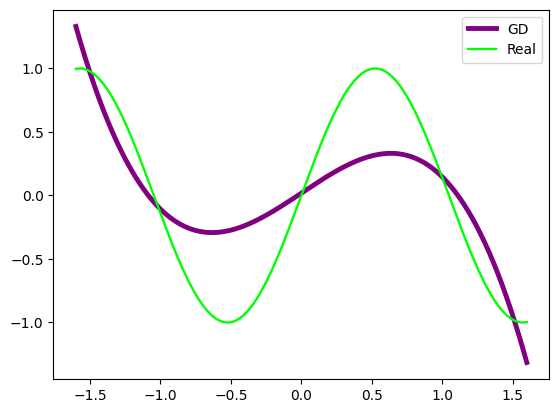

In [86]:
bath_size = 50
degree = 5

sgd = stochastic(X, Y, batch_size=bath_size)
result = sgd.gradient_descent(np.zeros(degree, dtype=float), max_epochs=500, initial_lr=0.05, apply_min=True, apply_value=False)
print(f'answer: {result[-1]}')
print(f'answer: {sgd.mse_loss(result[-1])}')

Answer_Y = np.array([f(x, result[-1]) for x in X])

plt.plot(X, Answer_Y, label='GD', color='purple', antialiased=True, linewidth=3.5)
plt.plot(X, Y, label='Real', color='lime', antialiased=True, linewidth=1.7)
plt.legend()
plt.show()
